<a href="https://colab.research.google.com/github/chris-creditdesign/nih-grant-terminations/blob/main/less_than_3_flagged_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv("/content/2024-03-31-NIH Grant Terminations_ Auto-Generated - grant_data.csv")

# Drop any rows where the 'cancellation_source' column is not 'HHS reported' or 'Self reported'
df_confirmed = df[df['cancellation_source'].isin(['HHS reported', 'Self reported', 'Self and HHS reported'])]
total_grants_count = len(df_confirmed)
print(f"There are {total_grants_count} rows in the dataframe.")

There are 704 rows in the dataframe.


In [ ]:
# Create a new list of booleans. True represents less than 3 terms
flagged_words_count_less_than_3 = []

# Iterate through the 'flagged_words' column
for flagged_words_string in df_confirmed["flagged_words"]:

  if pd.isnull(flagged_words_string):
    flagged_words_count_less_than_3.append(True)
    continue

  # Split the string into individual terms using commas as delimiters
  flagged_words_list = [flagged_word.strip().lower() for flagged_word in str(flagged_words_string).split(',')]

  flagged_words_count_less_than_3.append(len(flagged_words_list) < 3)

In [ ]:
df_less_than_3_flagged_words = df_confirmed[flagged_words_count_less_than_3]

In [ ]:
print(f"There are {len(df_less_than_3_flagged_words)} cancelled projects with less than 3 flagged words")

There are 110 cancelled projects with less than 3 flagged words


In [ ]:
# One of the grants has no 'org_name' and very few other details.

df_less_than_3_flagged_words['core_award_number'].iloc[-1]

'T34GM153609'

In [ ]:
less_than_3_flagged_words_org_name_count = df_less_than_3_flagged_words['org_name'].value_counts().sort_values(ascending=False)

In [ ]:
print(f"There are {len(less_than_3_flagged_words_org_name_count)} organisations with Grants containing less than 3 flagged words")

There are 42 organisations with Grants containing less than 3 flagged words


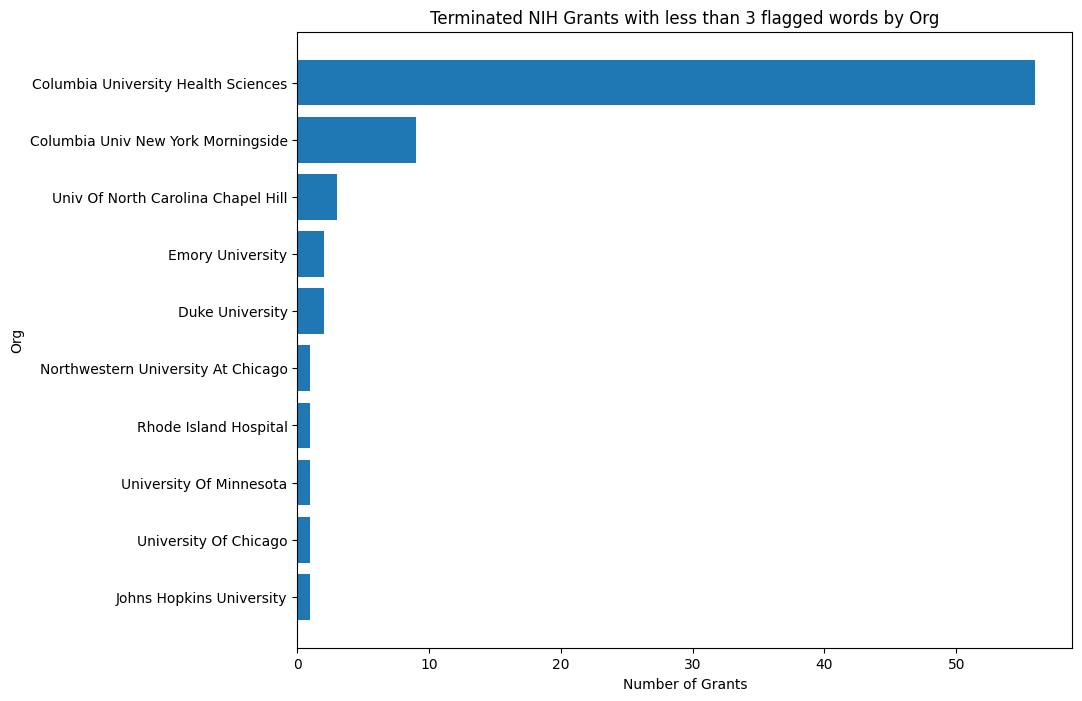

In [ ]:
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
plt.barh(less_than_3_flagged_words_org_name_count[:10].index, less_than_3_flagged_words_org_name_count[:10].values)
plt.xlabel('Number of Grants')
plt.ylabel('Org')
plt.title('Terminated NIH Grants with less than 3 flagged words by Org')

# Invert the y-axis
plt.gca().invert_yaxis()

plt.show()

- Columbia has 56 + 9 = 65
- Univ Of North Carolina Chapel Hill has 3
- Emory Univ has 2
- Duke University has 2

Total = 72

The remainder have one each. 42 - 5 = 37

37 + 72 = 109